# Hypothesis Testing with Insurance Data (Core)

by Israel Diaz

## Assignment

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

Q1. Do smokers have higher insurance charges than non-smokers?
Q2. Are men more likely to smoke than women?
Q3. Do different regions have different charges, on average?


For each question, make sure to:

* State your Null Hypothesis and Alternative Hypothesis
* Select the correct test according to the data type and number of samples
* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis
* Show a supporting visualization that helps display the result

## Solution

### Load Libraries and Data

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Stats
import scipy.stats as stats

In [2]:
## data
url = 'https://drive.google.com/uc?export=download&id=1SJfpL9oscLbzBbwU2hFKIHruwF1QkhT6'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f'Number of instances: {len(data)}')

Number of instances: 1338


### Hypothesis Testing

#### Q1. Do smokers have higher insurance charges than non-smokers?

In [4]:
alpha = 0.05

In [5]:
## Selecting data

smoker = data.loc[data['smoker'] == 'yes', 'charges']
no_smoker = data.loc[data['smoker'] == 'no', 'charges']

In [6]:
print(f"Smoker (n={len(smoker)}): Mean={np.mean(smoker):.2f}")
print(f"No Smoker (n={len(no_smoker)}): Mean={np.mean(no_smoker):.2f}")

Smoker (n=274): Mean=32050.23
No Smoker (n=1064): Mean=8434.27


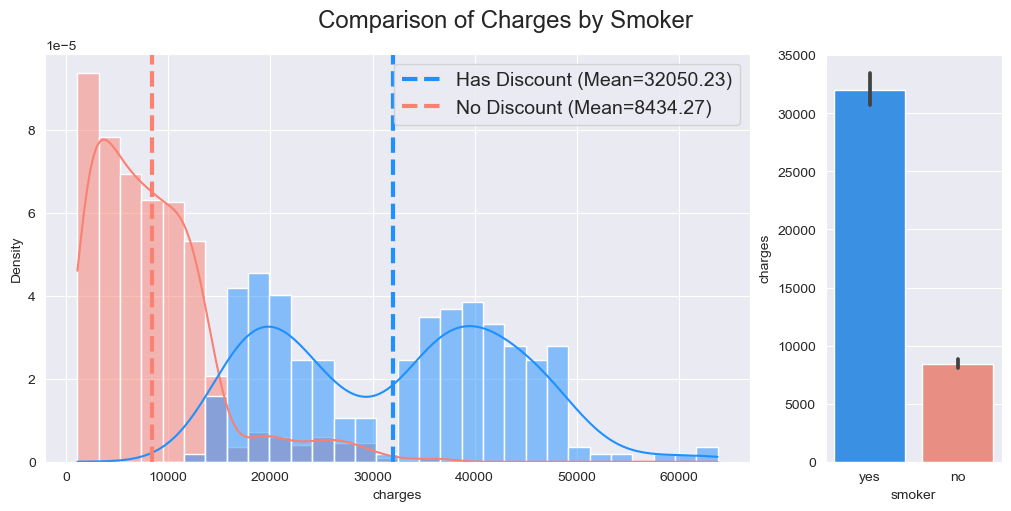

In [7]:
### Comparison of Height by Gender

smoker_palette={'yes' :'dodgerblue', 'no' :'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=data, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker), ls='--',lw=3,
           label=f"Has Discount (Mean={np.mean(smoker):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(no_smoker), ls='--', lw=3,
           label=f"No Discount (Mean={np.mean(no_smoker):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=data, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoker',fontsize='xx-large');

**Hypothesis Statement**

H0 = **There is not significant difference between the amount charged to smokers or not smokers**
H1 = **There is significant difference between amount charged to smokers and not smokers.**

To solve this problem I'll use the Independent 2 Samples T-Test

**Test Assumtions**

In [8]:
## hunting outlier in `smoker` data
zscores_y = stats.zscore(smoker)
outliers_y = abs(zscores_y)>3
print(f'Smoker Outliers: {np.sum(outliers_y)}')

## hunting outlier in `no smoker` data
zscores_n = stats.zscore(no_smoker)
outliers_n = abs(zscores_n)>3
print(f'No Smoker Outliers: {np.sum(outliers_n)}')

Smoker Outliers: 0
No Smoker Outliers: 24


In [9]:
## drop outliers
no_smoker = no_smoker[~outliers_n]

In [10]:
## Testing Normality
result_y = stats.normaltest(smoker)
if result_y[1] > alpha:
    print(f'Normal Distribution (p-value={result_y[1]} > {alpha})')
else:
    print(f'Not Normal Distribution (p-value={result_y[1]} < {alpha})')

Not Normal Distribution (p-value=5.564930630036463e-14 < 0.05)


In [11]:
result_n = stats.normaltest(no_smoker)
if result_n[1] > alpha:
    print(f'Normal Distribution (p-value={result_n[1]} > {alpha})')
else:
    print(f'Not Normal Distribution (p-value={result_n[1]} < {alpha})')

Not Normal Distribution (p-value=2.6945416315543976e-36 < 0.05)


Both groups are not normal distributed, but as we have more than 15 observations we can ignore this assumption of normality.

In [12]:
## Equal Variance

result = stats.levene(smoker, no_smoker)
if result[1] > alpha:
    print(f'Assume Equal Variance (p-value={result[1]} > {alpha})')
else:
    print(f'Not assume Equal Variance (p-value={result[1]} < {alpha})')

Not assume Equal Variance (p-value=2.4247238784347824e-97 < 0.05)


The variance is no similar, so I will perform a Welch's 2 sample T Test, insteat the classic T Test.

#### Welch's 2 Sample T Test

In [13]:
## Final t-test
welch_t_test = stats.ttest_ind(smoker, no_smoker)
## is our result significant
print(f"p-value={welch_t_test.pvalue}")
print(f"Significant: {welch_t_test.pvalue < alpha}")

p-value=3.68768124e-315
Significant: True


**We Reject the Null Hypothesis** then accept the alternate hypothesis.
There is significant difference between amount charged to smokers and not smokers.

#### Q2. Are men more likely to smoke than women?

**Hypothesis Statement**

H0 = **There is not significant difference between men and women whose smoke or not**
H1 = **There is significant difference between men and women whose smoke and not smoke**

To solve this problem I'll use the Chi-Squared Test

I'll use the same sample to perform the Chi-Squared Test because I intend compare a binary category vs a categorical groups

In [14]:
## Arranging data
table = pd.crosstab(data['sex'], data['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


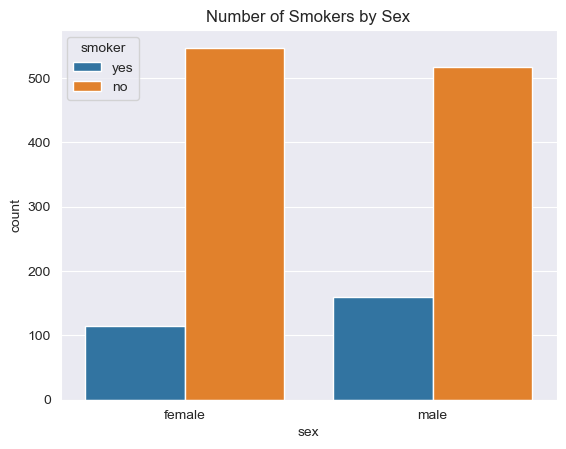

In [15]:
ax = sns.countplot(data=data, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [16]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

We **Reject** the null hypothesis that states  **There is not significant difference between men and women whose smoke or not** Since our p < .05. Then Accept the Alternate Hypothesis that states **There is significant difference between men and women whose smoke and not smoke**

#### Q3. Do different regions have different charges, on average?

In [17]:
## determining groups
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
northeast = data.loc[data['region'] == 'northeast', 'charges']
northwest = data.loc[data['region'] == 'northwest', 'charges']
southwest = data.loc[data['region'] == 'southwest', 'charges']
southeast = data.loc[data['region'] == 'southeast', 'charges']

In [19]:
print(f"northeast (n={len(northeast)}): Mean={np.mean(northeast):.2f}")
print(f"northwest (n={len(northwest)}): Mean={np.mean(northwest):.2f}")
print(f"southwest (n={len(southwest)}): Mean={np.mean(southwest):.2f}")
print(f"southeast (n={len(southeast)}): Mean={np.mean(southeast):.2f}")

northeast (n=324): Mean=13406.38
northwest (n=325): Mean=12417.58
southwest (n=325): Mean=12346.94
southeast (n=364): Mean=14735.41


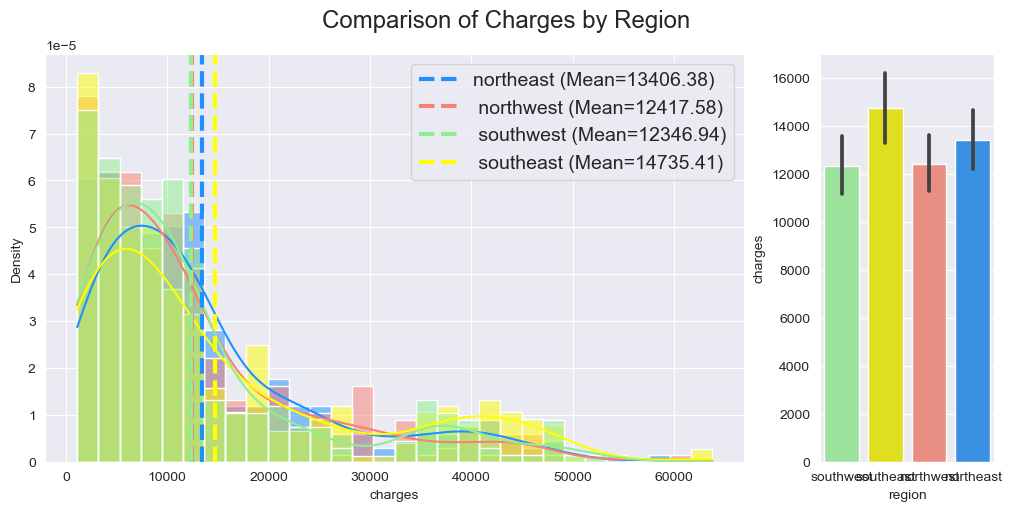

In [20]:
### Comparison of Height by Gender

region_palette={'northeast' :'dodgerblue', 'northwest' :'salmon', 'southwest':'lightgreen', 'southeast':'yellow'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=data, x='charges',fill=True,hue='region',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=region_palette)

ax.axvline(np.mean(northeast), ls='--',lw=3,
           label=f"northeast (Mean={np.mean(northeast):.2f})",color=region_palette['northeast'])

ax.axvline(np.mean(northwest), ls='--', lw=3,
           label=f" northwest (Mean={np.mean(northwest):.2f})",color=region_palette['northwest'])

ax.axvline(np.mean(southwest), ls='--', lw=3,
           label=f" southwest (Mean={np.mean(southwest):.2f})",color=region_palette['southwest'])

ax.axvline(np.mean(southeast), ls='--', lw=3,
           label=f" southeast (Mean={np.mean(southeast):.2f})",color=region_palette['southeast'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=data, x='region',y='charges',ax = ax_bar,palette=region_palette)
fig.suptitle('Comparison of Charges by Region',fontsize='xx-large');

**Hypothesis Statement**

H0 = **There is not significant difference between the region and charges**
H1 = **There is significant difference between the region and charges**

To solve this problem I'll use the One Way ANOVA Test

In [21]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in data['region'].unique():
    ## Get series for group and rename
    data_sample = data.loc[data['region']==i,'charges'].copy()

    # save into the dictionary
    groups[i] = data_sample
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Testing Assumptions

In [22]:
## Normality

## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                       'p':p,
                       'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
### checking sig with pandas
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Not Normal Distributed, but as we have more than 15 observations in each category we can ignore this assumption

In [24]:
## Testing Assumption of Equal Variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

We fail to met the equal variance test since our p < 0.05, t, then is not possible to perform the One Way Anova Test, instead we'll perform the Kruskal-Wallis test.

#### Kruskal-Wallis Test

In [25]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

We fail to reject the NULL hypothesis that states **There is not significant differences between the region and charges** since out p-value > 0.05.
